In [140]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [141]:
# Pembutan Model/Arsitektur Neural Network
dnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dense(50),
    # tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dense(20),
    # tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation="linear")
])

In [142]:
# costom loss function
def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred-y_true)))

def lms(y_true,y_pred):
  return (K.square(y_pred-y_true))/2


In [143]:
# Model Compiler dengan least mean square untuk loss and Adam untuk optimizer
dnn_model.compile(loss=lms, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [144]:
# Dataset
df = pd.read_csv('J1_Atas Bawah.csv')
df.dropna(inplace=True)

df = df.sample(frac = 1)

X = df[['x', 'y', 'z', 'roll', 'pitch', 'yaw']]
y = df[['theta1', 'theta2', 'theta3', 'theta4']]

train_size = int(0.80 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [145]:
# Fungsi Pembatasan Error/Loss
class myCallback(Callback):    
    def on_epoch_end(self, epoch, logs={}):
        print("Checking loss at end of epoch...")
        if logs['val_loss'] <= 0.00001:
               self.model.stop_training = True
        else:
          print ('not yet...')

In [146]:
# Training dataset
loss_callback_obj = myCallback()
dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, batch_size=200, verbose=1, callbacks=[loss_callback_obj]);

Epoch 1/10000
1/7 [===>..........................] - ETA: 5s - loss: 0.2904Checking loss at end of epoch...
not yet...
7/7 [==============================] - 1s 36ms/step - loss: 116346.7656 - val_loss: 0.9232
Epoch 2/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.9960Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 13ms/step - loss: 0.7839 - val_loss: 0.4917
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.4883Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 14ms/step - loss: 0.4007 - val_loss: 0.3095
Epoch 4/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.2738Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 13ms/step - loss: 0.2579 - val_loss: 0.2153
Epoch 5/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.1858Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 13ms/step - lo

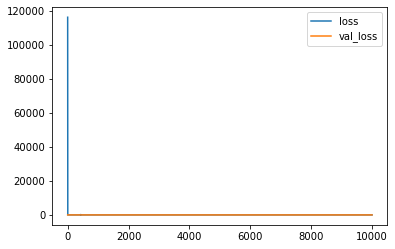

In [147]:
# Perbandingan loss dan validation loss 
history_df =pd.DataFrame(dnn_model.history.history)
loss_plot = history_df[['loss', 'val_loss']].plot()
fig = loss_plot.get_figure()
#fig.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Error PO/e1_h5_n50_n300_n100_n50_n20 (e0.00001).png')
#fig.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Error PO/e1_h3_n400_n400_n400 (lr0.1 e0.00001).png')

In [148]:
# Testing
X_target = X_test.iloc[0:].values
Y_target = y_test.iloc[0:].values

Y_prediksi = dnn_model.predict(X_target)

10/10 [==============================] - 0s 2ms/step


,theta1,theta1_pred,theta2,theta2_pred,theta3,theta3_pred,theta4,theta4_pred
233,-1.570,-0.182736,0.100,0.229063,-0.557,-0.110907,-0.299,-0.718391
30,-1.570,-0.182736,0.037,0.229063,-0.757,-0.110907,-0.110,-0.718391
31,-1.570,-0.182736,0.472,0.229063,0.622,-0.110907,-1.416,-0.718391
279,-1.570,-0.182736,0.523,0.229063,0.785,-0.110907,-1.570,-0.718391
108,-1.570,-0.182736,0.375,0.229063,0.315,-0.110907,-1.125,-0.718391
...,...,...,...,...,...,...,...,...
26,1.448,-0.182736,0.020,0.229063,-0.811,-0.110907,-0.059,-0.718391
161,1.494,-0.182736,0.013,0.229063,-0.833,-0.110907,-0.038,-0.718391
48,1.508,-0.182736,0.010,0.229063,-0.840,-0.110907,-0.031,-0.718391
237,1.535,-0.182736,0.006,0.229063,-0.854,-0.110907,-0.018,-0.718391


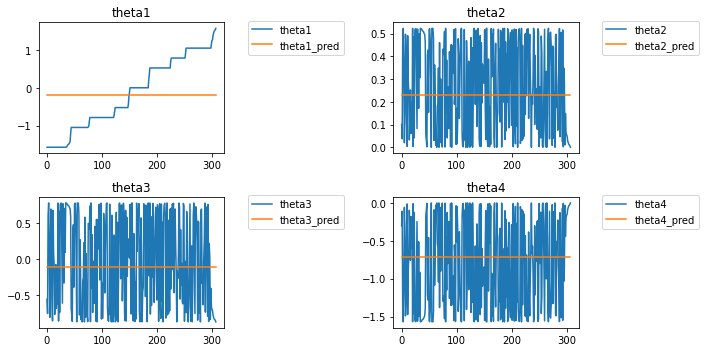

In [149]:
# Data Tabel dan Grafik Hasil Testing
dataf = pd.DataFrame({'theta1':Y_target[:,0], 'theta1_pred':Y_prediksi[:,0],
                  'theta2':Y_target[:,1], 'theta2_pred':Y_prediksi[:,1],
                  'theta3':Y_target[:,2], 'theta3_pred':Y_prediksi[:,2],
                  'theta4':Y_target[:,3], 'theta4_pred':Y_prediksi[:,3]}).sort_values(by=['theta1'])

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,5))
axes = ax.flatten()

axes[0].plot([i for i in range(len(dataf))], dataf['theta1'], label='theta1')
axes[0].plot([i for i in range(len(dataf))], dataf['theta1_pred'], label='theta1_pred')
axes[0].set_title('theta1')
axes[0].legend(bbox_to_anchor=(1.1, 1.05))

axes[1].plot([i for i in range(len(dataf))], dataf['theta2'], label='theta2')
axes[1].plot([i for i in range(len(dataf))], dataf['theta2_pred'], label='theta2_pred')
axes[1].set_title('theta2')
axes[1].legend(bbox_to_anchor=(1.1, 1.05))

axes[2].plot([i for i in range(len(dataf))], dataf['theta3'], label='theta3')
axes[2].plot([i for i in range(len(dataf))], dataf['theta3_pred'], label='theta3_pred')
axes[2].set_title('theta3')
axes[2].legend(bbox_to_anchor=(1.1, 1.05))

axes[3].plot([i for i in range(len(dataf))], dataf['theta4'], label='theta4')
axes[3].plot([i for i in range(len(dataf))], dataf['theta4_pred'], label='theta4_pred')
axes[3].set_title('theta4')
axes[3].legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
dataf
#plt.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Joint PO/J1_h5_n50_n300_n100_n50_n20 (e0.00001).png')
#plt.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Joint PO/J1_h3_n400_n400_n400(lr0.001 e0.00001).png')

In [150]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_target, Y_prediksi)

0.4212467916452529

In [151]:
# Root Mean Square Error
rmse(Y_target, Y_prediksi)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6490352776585049>

In [155]:
#save file
#df.to_csv('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Data/Data Hidden dan Neuron/posisi orientasi/test_h3_4300_n400_n400 (e0.00001).csv', index=False)
#df.to_csv('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Data/Data Hidden dan Neuron/posisi orientasi/test_h3_n400_n400_n400(lr0.1 0.00001).csv', index=False)

In [153]:
# Test Data
# Masukan Input disini 
data = {
    'x': 0,
    'y': 0,
    'z': 0.1,
    'roll': 0,
    'pitch': 0,
    'yaw': 0
}

# Create a DataFrame with a single row
df = pd.DataFrame(data, index=[0])

Y_prediksi = dnn_model.predict(df)
print(Y_prediksi)

1/1 [==============================] - 0s 86ms/step
[[-0.18273634  0.22906311 -0.11090674 -0.7183908 ]]


In [154]:
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 400)               2800      
                                                                 
 activation_15 (Activation)  (None, 400)               0         
                                                                 
 dense_21 (Dense)            (None, 400)               160400    
                                                                 
 activation_16 (Activation)  (None, 400)               0         
                                                                 
 dense_22 (Dense)            (None, 400)               160400    
                                                                 
 activation_17 (Activation)  (None, 400)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                